# Preprocess

In [1]:
import zipfile
import os

zip_path = 'mxnet_data.zip'
extract_to = 'mxnet_data'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

In [2]:
!sudo apt-get update
!sudo apt-get install -y libgl1

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]      
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]      
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [3092 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1540 kB]
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates/multiverse amd64 Packages [55.7 kB]
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Packages [4148 kB]
Get:9 http://archive.ubuntu.com/ubuntu jammy-backports/main amd64 Packages [82.7 kB]
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports/universe amd64 Packages [35.2 kB]
Get:11 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2775 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1241 kB]
Get:13 http://

In [3]:
import sys
!{sys.executable} -m pip install opencv-python
!{sys.executable} -m pip install mxnet
!{sys.executable} -m pip install numpy==1.23.5

  Using cached opencv_python-4.11.0.86-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
Using cached opencv_python-4.11.0.86-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (63.0 MB)
  Using cached mxnet-1.9.1-py3-none-manylinux2014_x86_64.whl.metadata (3.4 kB)
  Using cached graphviz-0.8.4-py2.py3-none-any.whl.metadata (6.4 kB)
Using cached mxnet-1.9.1-py3-none-manylinux2014_x86_64.whl (49.1 MB)
Using cached graphviz-0.8.4-py2.py3-none-any.whl (16 kB)
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.3
    Uninstalling graphviz-0.20.3:
      Successfully uninstalled graphviz-0.20.3
  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.

In [4]:
RESIZE_SIZE = 256
BASE_DIR = "mxnet_data"

In [5]:
!python tools/im2rec.py --resize $RESIZE_SIZE --pack-label train $BASE_DIR/
!python tools/im2rec.py --resize $RESIZE_SIZE --pack-label validation $BASE_DIR/

Creating .rec file from /home/sagemaker-user/src/train.lst in /home/sagemaker-user/src
multiprocessing not available, fall back to single threaded encoding
time: 0.012334108352661133  count: 0
time: 13.00005555152893  count: 1000
Creating .rec file from /home/sagemaker-user/src/validation.lst in /home/sagemaker-user/src
multiprocessing not available, fall back to single threaded encoding
time: 0.011149883270263672  count: 0


In [6]:
import sagemaker
SAGEMAKER_SESSION = sagemaker.Session()
ROLE = sagemaker.get_execution_role()

BUCKET = "objdetection-bucket"

sagemaker.config INFO - Fetched defaults config from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/sagemaker-user/.config/sagemaker/config.yaml
sagemaker.config INFO - Applied value from config key = SageMaker.PythonSDK.Modules.Session.DefaultS3Bucket
sagemaker.config INFO - Applied value from config key = SageMaker.PythonSDK.Modules.Session.DefaultS3ObjectKeyPrefix
sagemaker.config INFO - Applied value from config key = SageMaker.PythonSDK.Modules.Session.DefaultS3Bucket
sagemaker.config INFO - Applied value from config key = SageMaker.PythonSDK.Modules.Session.DefaultS3ObjectKeyPrefix
sagemaker.config INFO - Applied value from config key = SageMaker.PythonSDK.Modules.Session.DefaultS3Bucket
sagemaker.config INFO - Applied value from config key = SageMaker.PythonSDK.Modules.Session.DefaultS3ObjectKeyPrefix


In [7]:
train_channel = "mxnet_data/train"
SAGEMAKER_SESSION.upload_data(path= "train.rec", bucket = BUCKET, key_prefix = train_channel)
validation_channel = "mxnet_data/validation"
SAGEMAKER_SESSION.upload_data(path= "validation.rec", bucket = BUCKET, key_prefix = validation_channel)

's3://objdetection-bucket/mxnet_data/validation/validation.rec'

# Train

In [1]:
import sagemaker
SAGEMAKER_SESSION = sagemaker.Session()
ROLE = sagemaker.get_execution_role()

BUCKET = "objdetection-bucket"
S3_OUTPUT_PATH = f"s3://{BUCKET}/output"
S3_TRAIN_CHANNEL = f"s3://{BUCKET}/mxnet_data/train"
S3_VALIDATION_CHANNEL = f"s3://{BUCKET}/mxnet_data/validation"

INSTANCE1 = "ml.m4.xlarge"
INSTANCE2 = "ml.g4dn.xlarge"

TRAINING_IMAGE = sagemaker.image_uris.retrieve(
    region = SAGEMAKER_SESSION.boto_region_name, 
    framework = "object-detection", 
    version = "1"
)

sagemaker.config INFO - Fetched defaults config from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/sagemaker-user/.config/sagemaker/config.yaml
sagemaker.config INFO - Applied value from config key = SageMaker.PythonSDK.Modules.Session.DefaultS3Bucket
sagemaker.config INFO - Applied value from config key = SageMaker.PythonSDK.Modules.Session.DefaultS3ObjectKeyPrefix
sagemaker.config INFO - Applied value from config key = SageMaker.PythonSDK.Modules.Session.DefaultS3Bucket
sagemaker.config INFO - Applied value from config key = SageMaker.PythonSDK.Modules.Session.DefaultS3ObjectKeyPrefix
sagemaker.config INFO - Applied value from config key = SageMaker.PythonSDK.Modules.Session.DefaultS3Bucket
sagemaker.config INFO - Applied value from config key = SageMaker.PythonSDK.Modules.Session.DefaultS3ObjectKeyPrefix


In [2]:
estimator = sagemaker.estimator.Estimator(
    TRAINING_IMAGE,
    ROLE,
    instance_count = 1,
    instance_type = INSTANCE2,
    input_mode = "File",
    output_path = S3_OUTPUT_PATH,
    sagemaker_session = SAGEMAKER_SESSION,
)

train_data = sagemaker.inputs.TrainingInput(
            S3_TRAIN_CHANNEL,
            distribution = "FullyReplicated",
            content_type = "application/x-recordio",
            s3_data_type = "S3Prefix"
)

validation_data = sagemaker.inputs.TrainingInput(
            S3_VALIDATION_CHANNEL,
            distribution = "FullyReplicated",
            content_type = "application/x-recordio",
            s3_data_type = "S3Prefix"
)

data_channels = {"train": train_data, "validation": validation_data}

sagemaker.config INFO - Applied value from config key = SageMaker.TrainingJob.VpcConfig.Subnets
sagemaker.config INFO - Applied value from config key = SageMaker.TrainingJob.VpcConfig.SecurityGroupIds


In [ ]:
num_classes = 1
num_training_samples = 1034
num_epochs = 100

estimator.set_hyperparameters(
    num_classes = num_classes,
    num_training_samples = num_training_samples,
    base_network = "resnet-50",
    use_pretrained_model = 1,
    # early_stopping = True,
    image_shape = 512,
    epochs = num_epochs,
    learning_rate = 0.001,
    mini_batch_size = 16,
    # optimizer = "adam",
    optimizer = "sgd",
    lr_scheduler_step = "50,70,80,90,95",
    lr_scheduler_factor = 0.1,
    momentum = 0.9,
    weight_decay = 0.0005,
    nms_threshold = 0.45,
)

estimator.fit(inputs = data_channels, logs = True)


# from sagemaker.tuner import CategoricalParameter, ContinuousParameter, HyperparameterTuner

# hyperparameter_ranges = {
#     "learning_rate": ContinuousParameter(0.001,0.1),
#     "optimizer": CategoricalParameter(["sgd","adam"])
# }

# estimator.set_hyperparameters(
#     num_classes = num_classes,
#     num_training_samples = num_training_samples,
#     base_network = "resnet-50",
#     use_pretrained_model = 1,
#     image_shape = 512,
#     epochs = num_epochs,
#     mini_batch_size = 16,
#     lr_scheduler_step = "50,70,80,90,95",
#     lr_scheduler_factor = 0.1,
#     momentum = 0.9,
#     weight_decay = 0.0005,
#     nms_threshold = 0.45,
# )

# tuner = HyperparameterTuner(
#     estimator = estimator,
#     objective_metric_name = "validation:mAP",
#     hyperparameter_ranges = hyperparameter_ranges,
#     objective_type = "Maximize",
#     max_jobs = 4,
#     max_parallel_jobs = 1
# )

# tuner.fit(inputs = data_channels, logs = True)

2025-04-07 12:01:12 Starting - Starting the training job...
2025-04-07 12:01:28 Starting - Preparing the instances for training...
2025-04-07 12:02:12 Downloading - Downloading the training image............
2025-04-07 12:03:59 Training - Training image download completed. Training in progress..Docker entrypoint called with argument(s): train
Running default environment configuration script
Nvidia gpu devices, drivers and cuda toolkit versions (only available on hosts with GPU):
Mon Apr  7 12:04:11 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.144.03             Driver Version: 550.144.03     CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                       

# Inference

In [1]:
import sagemaker
SAGEMAKER_SESSION = sagemaker.Session()
ROLE = sagemaker.get_execution_role()

BUCKET = "objdetection-bucket"
S3_MODEL_ARTIFACT = "s3://objdetection-bucket/output/object-detection-2025-04-07-12-01-09-370/output/model.tar.gz"

INSTANCE = "ml.m5.xlarge"

TRAINING_IMAGE = sagemaker.image_uris.retrieve(
    region = SAGEMAKER_SESSION.boto_region_name, 
    framework = "object-detection",
    version = "1"
)

model = sagemaker.model.Model(
    image_uri = TRAINING_IMAGE,
    model_data = S3_MODEL_ARTIFACT,
    role = ROLE
)

sagemaker.config INFO - Fetched defaults config from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/sagemaker-user/.config/sagemaker/config.yaml
sagemaker.config INFO - Applied value from config key = SageMaker.PythonSDK.Modules.Session.DefaultS3Bucket
sagemaker.config INFO - Applied value from config key = SageMaker.PythonSDK.Modules.Session.DefaultS3ObjectKeyPrefix
sagemaker.config INFO - Applied value from config key = SageMaker.PythonSDK.Modules.Session.DefaultS3Bucket
sagemaker.config INFO - Applied value from config key = SageMaker.PythonSDK.Modules.Session.DefaultS3ObjectKeyPrefix
sagemaker.config INFO - Applied value from config key = SageMaker.PythonSDK.Modules.Session.DefaultS3Bucket
sagemaker.config INFO - Applied value from config key = SageMaker.PythonSDK.Modules.Session.DefaultS3ObjectKeyPrefix
sagemaker.config INFO - Applied value from config key = SageMaker.Model.VpcConfig


In [2]:
import matplotlib.pyplot as plt
from matplotlib import patches
from PIL import Image
import random


def plot_image_bbox(image_path, detections, threshold):
    image = Image.open(image_path)
    width, height = image.size
    plt.imshow(image)

    detections = [d for d in detections if d[1] >= threshold]
    num_detections = len(detections)
    cmap = plt.get_cmap("tab10")

    for detection in detections:
        (cls, score, x0, y0, x1, y1) = detection
        xmin = int(x0 * width)
        ymin = int(y0 * height)
        xmax = int(x1 * width)
        ymax = int(y1 * height) 
        rgba = cmap(int(cls))
        rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                 linewidth=2, edgecolor=rgba, facecolor='none')
        plt.gca().add_patch(rect)
        plt.gca().text(
            xmin,
            ymin - 2,
            "{:.3f}".format(score),
            bbox = dict(facecolor=rgba, alpha=0.5),
            fontsize = 12,
            color = "white"
        )
    plt.title("Number of detections: " + str(num_detections))
    plt.show()

## Endpoint

In [3]:
endpoint_name = 'objdetection-endpoint'

deployment = model.deploy(
    initial_instance_count = 1,
    instance_type = INSTANCE,
    endpoint_name = endpoint_name
)

sagemaker.config INFO - Applied value from config key = SageMaker.PythonSDK.Modules.Session.DefaultS3Bucket
sagemaker.config INFO - Applied value from config key = SageMaker.PythonSDK.Modules.Session.DefaultS3ObjectKeyPrefix
---------!

Number of detections: 7


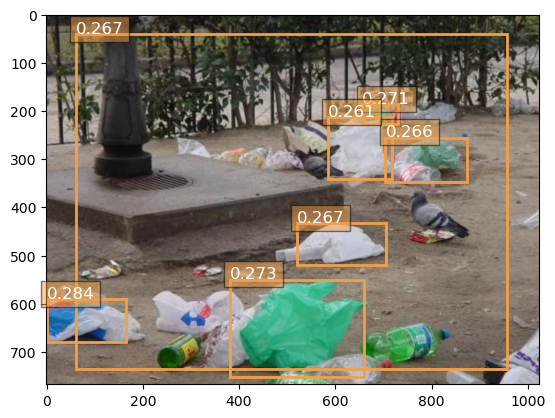

In [4]:
import json 
import boto3

RUNTIME = boto3.client(service_name = "runtime.sagemaker")

def show_prediction(filename, ep, threshold = 0.3):
    b = ""
    with open(filename, "rb" ) as image:
        f = image.read()
        b = bytearray(f)
    endpoint_response = RUNTIME.invoke_endpoint(EndpointName = ep, ContentType = "image/jpeg", Body = b)
    results = endpoint_response["Body"].read()
    detections = json.loads(results)
    
    plot_image_bbox(filename, detections['prediction'], threshold)


show_prediction('51bae1d112045cfe.jpg', endpoint_name, 0.26)

## Batch Transform

In [3]:
from datetime import datetime

date_today = datetime.today().strftime('%Y-%m-%d')
year, month, day = date_today.split('-')

BATCH_BUCKET = 'objdetection-batch-transform'
OUTPUT_PREFIX = f'batch_output/{year}/{month}/{day}'
S3_BATCH_OUTPUT = f"s3://{BATCH_BUCKET}/{OUTPUT_PREFIX}"

INPUT_PREFIX = f'batch_input/{year}/{month}/{day}'
S3_BATCH_INPUT = f"s3://{BATCH_BUCKET}/{INPUT_PREFIX}"

In [4]:
transformer = model.transformer(
    instance_count = 1,
    output_path = S3_BATCH_OUTPUT,
    instance_type = INSTANCE
)

transformer.transform(S3_BATCH_INPUT, content_type = "image/jpeg")

sagemaker.config INFO - Applied value from config key = SageMaker.PythonSDK.Modules.Session.DefaultS3Bucket
sagemaker.config INFO - Applied value from config key = SageMaker.PythonSDK.Modules.Session.DefaultS3ObjectKeyPrefix
.......................................Docker entrypoint called with argument(s): serve
Running default environment configuration script
Running custom environment configuration script
/opt/amazon/lib/python3.8/site-packages/mxnet/model.py:97: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if num_device is 1 and 'dist' not in kvstore:
[04/07/2025 20:01:59 INFO 139789004859200] loaded entry point class algorithm.serve.server_config:config_api
[04/07/2025 20:01:59 INFO 139789004859200] loading entry points
[04/07/2025 20:01:59 INFO 139789004859200] loaded request iterator application/x-image
[04/07/2025 20:01:59 INFO 139789004859200] loaded request iterator image/jpeg
[04/07/2025 20:01:59 INFO 139789004859200] loaded request iterator image/png
[04/07/2025 2

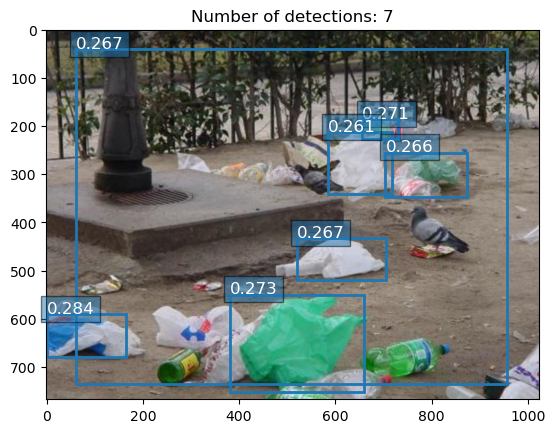

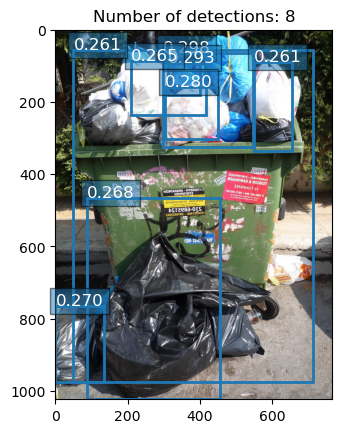

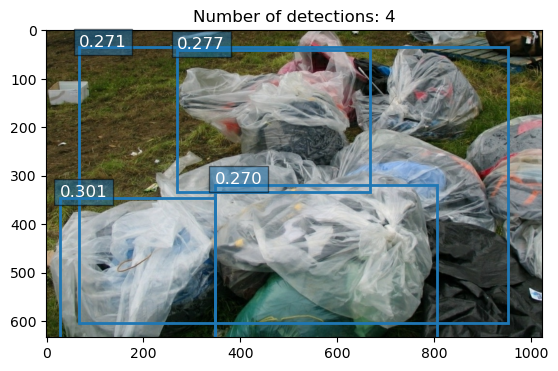

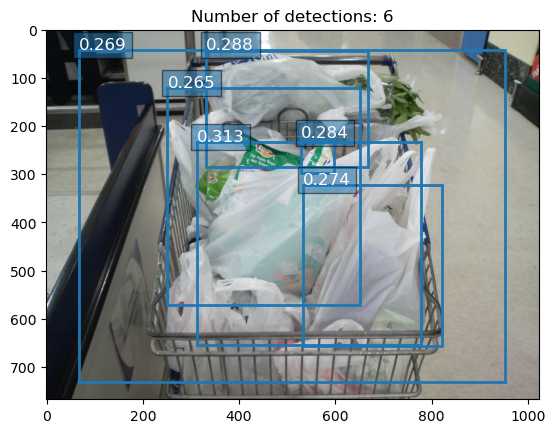

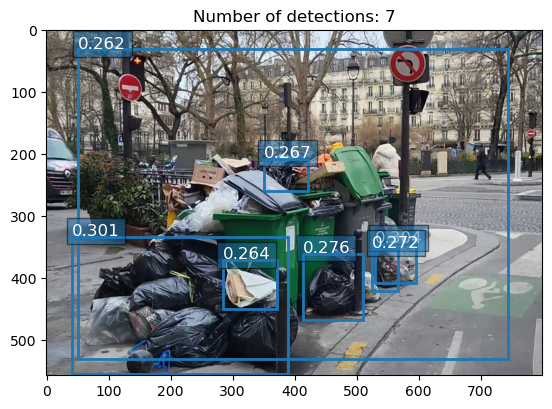

In [5]:
import os
import json
import boto3
from sagemaker.s3 import S3Downloader
from io import BytesIO


def get_filenames(bucket, prefix):
    s3 = boto3.client('s3')
    paginator = s3.get_paginator('list_objects_v2')
    pages = paginator.paginate(Bucket=bucket, Prefix=prefix)
    filenames = []
    for page in pages:
        for obj in page.get('Contents', []):
            filenames.append(obj['Key'])
    return filenames

def show_batch_results(input_filenames, output_filenames, threshold):
    s3 = boto3.client('s3')
    
    for input_filename, output_filename in zip(input_filenames, output_filenames):
        response = s3.get_object(Bucket=BATCH_BUCKET, Key=input_filename)
        image_data = response['Body'].read()
        image_data = BytesIO(image_data)

        response = s3.get_object(Bucket=BATCH_BUCKET, Key=output_filename)
        detections = response['Body'].read()
        detections = json.loads(detections)

        plot_image_bbox(image_data, detections['prediction'], threshold)
        print()
        

input_filenames = get_filenames(BATCH_BUCKET, INPUT_PREFIX)
output_filenames = get_filenames(BATCH_BUCKET, OUTPUT_PREFIX)
show_batch_results(input_filenames, output_filenames, threshold=0.26)